# Preparing Files

In [1]:
import pandas as pd

## Import Column

In [2]:
wos = pd.read_excel("wosXAIhealth.xls")
scopus = pd.read_csv("scopusXAIhealth.csv")
print("scopus ",scopus.shape)
print("wos", wos.shape)

scopus  (604, 21)
wos (325, 72)


## Delete empty title


In [3]:
scopus.dropna(subset=["Title","Authors"],inplace=True)
wos.dropna(subset=["Article Title"], inplace=True)
print("scopus ",scopus.shape)
print("wos", wos.shape)

scopus  (589, 21)
wos (325, 72)


## Add Source

In [4]:
scopus['Indexed by'] = 'scopus'
wos['Indexed by'] = 'WoS'
print("scopus ",scopus.shape)
print("wos", wos.shape)

scopus  (589, 22)
wos (325, 73)


## Selecting Important Features

In [5]:
scopus=scopus[["Title","Year","Authors","Source title","DOI","Abstract","Publication Stage","Indexed by"]]
wos=wos[["Article Title","Publication Year","Authors","Source Title","DOI","Abstract","Indexed by"]]
print(scopus.shape, wos.shape)

(589, 8) (325, 7)


In [6]:
# wos.head()
scopus.head()

,Title,Year,Authors,Source title,DOI,Abstract,Publication Stage,Indexed by
0,Evaluation of Human-Understandability of Globa...,2024,Sivaprasad A.; Reiter E.; Tintarev N.; Oren N.,Communications in Computer and Information Sci...,10.1007/978-3-031-50396-2_3,In explainable artificial intelligence (XAI) r...,Final,scopus
1,"Biomedical Informatics: State of the Art, Chal...",2024,Leung C.K.,BioMedInformatics,10.3390/biomedinformatics4010006,Biomedical informatics can be considered as a ...,Final,scopus
2,An ensemble classification approach for cervic...,2024,Ali M.S.; Hossain M.M.; Kona M.A.; Nowrin K.R....,Healthcare Analytics,10.1016/j.health.2024.100324,Cervical cancer is a significant public health...,Final,scopus
3,NeuroNet: A Deep Learning Framework for Stroke...,2024,Prasad A.; Asha V.; Tressa N.; Sharma D.; Deep...,2nd International Conference on Intelligent Da...,10.1109/IDCIoT59759.2024.10467659,The revolutionary potential of a deep learning...,Final,scopus
4,Explainable Artificial Intelligence in Respons...,2024,Cervoni L.; Sleiman R.; Jacob D.; Roudesli M.,Communications in Computer and Information Sci...,10.1007/978-3-031-54303-6_2,"Osteoarticular pathologies, and particularly l...",Final,scopus


## lower the title

In [7]:
scopus['Title'] = scopus['Title'].str.lower()
wos['Article Title'] = wos['Article Title'].str.lower()
wos

,Article Title,Publication Year,Authors,Source Title,DOI,Abstract,Indexed by
0,editorial: explainable artificial intelligence...,2023,"He, Z; Zhang, R; Diallo, G; Huang, ZX; Glicksb...",FRONTIERS IN ARTIFICIAL INTELLIGENCE,10.3389/frai.2023.1282800,NaN,WoS
1,taming the chaos?! using explainable artificia...,2021,"Roessner, V; Rothe, J; Kohls, G; Schomerus, G;...",EUROPEAN CHILD & ADOLESCENT PSYCHIATRY,10.1007/s00787-021-01836-0,NaN,WoS
2,implementation of explainable artificial intel...,2023,"de Camargo, LF; Dias, DRC; Brega, JRF","COMPUTATIONAL SCIENCE AND ITS APPLICATIONS, IC...",10.1007/978-3-031-36805-9_37,Solutions based on Artificial Intelligence are...,WoS
3,an explainable artificial intelligence approac...,2023,"Zimmerman, RM; Hernandez, EJ; Watkins, WS; Blu...",AMERICAN JOURNAL OF CARDIOLOGY,10.1016/j.amjcard.2023.05.064,NaN,WoS
4,explainable artificial intelligence (ai) in ca...,2021,"Loh, DR; Yeo, SY; Tan, RS; Gao, F; Koh, AS",CIRCULATION,NaN,NaN,WoS
...,...,...,...,...,...,...,...
320,machine learning-based hospital discharge pred...,2021,"Ahn, I; Gwon, H; Kang, H; Kim, Y; Seo, H; Choi...",JMIR MEDICAL INFORMATICS,10.2196/32662,Background: Effective resource management in h...,WoS
321,adoption and utilization of medical decision s...,2023,"Khan, N; Okoli, CN; Ekpin, V; Attai, K; Chukwu...",EXPERT SYSTEMS WITH APPLICATIONS,10.1016/j.eswa.2023.119638,Medical decision support systems (MDSS) utiliz...,WoS
322,explainable artificial intelligence warning mo...,2023,"Kim, YK; Koo, JH; Lee, SJ; Song, HS; Lee, M",JOURNAL OF MEDICAL INTERNET RESEARCH,10.2196/48244,Background: Cardiac arrest (CA) is the leading...,WoS
323,explainable mortality prediction model for con...,2023,"Tasnim, N; Al Mamun, S; Islam, MS; Kaiser, MS;...",APPLIED SCIENCES-BASEL,10.3390/app13106138,A mortality prediction model can be a great to...,WoS


# Common Title

In [8]:
common_titles = pd.merge(scopus, wos, left_on="Title", right_on="Article Title", how='inner',indicator=True)
# common_titles = pd.merge(wos,scopus,  left_on="Article Title", right_on="Title", how='inner',indicator=True)
common_titles

,Title,Year,Authors_x,Source title,DOI_x,Abstract_x,Publication Stage,Indexed by_x,Article Title,Publication Year,Authors_y,Source Title,DOI_y,Abstract_y,Indexed by_y,_merge
0,explainable machine learning for breast cancer...,2024,Gurmessa D.K.; Jimma W.,BMJ Health and Care Informatics,10.1136/bmjhci-2023-100954,Background Breast cancer is the most common di...,Final,scopus,explainable machine learning for breast cancer...,2024,"Gurmessa, DK; Jimma, W",BMJ HEALTH & CARE INFORMATICS,10.1136/bmjhci-2023-100954,Background Breast cancer is the most common di...,WoS,both
1,adaptation of federated explainable artificial...,2024,Abid R.; Rizwan M.; Alabdulatif A.; Alnajim A....,"Computers, Materials and Continua",10.32604/cmc.2024.046880,Explainable Artificial Intelligence (XAI) has ...,Final,scopus,adaptation of federated explainable artificial...,2024,"Abid, R; Rizwan, M; Alabdulatif, A; Alnajim, A...",CMC-COMPUTERS MATERIALS & CONTINUA,10.32604/cmc.2024.046880,Explainable Artificial Intelligence (XAI) has ...,WoS,both
2,leveraging explainable artificial intelligence...,2024,Liu S.; McCoy A.B.; Peterson J.F.; Lasko T.A.;...,Journal of the American Medical Informatics As...,10.1093/jamia/ocae019,Objective: To develop and evaluate a data-driv...,Final,scopus,leveraging explainable artificial intelligence...,2024,"Liu, SR; Mccoy, AB; Peterson, JF; Lasko, TA; S...",JOURNAL OF THE AMERICAN MEDICAL INFORMATICS AS...,10.1093/jamia/ocae019,Objective To develop and evaluate a data-drive...,WoS,both
3,toward transparent ai for neurological disorde...,2024,Woodbright M.D.; Morshed A.; Browne M.; Ray B....,IEEE Access,10.1109/ACCESS.2024.3375877,The lack of interpretability and transparency ...,Final,scopus,toward transparent ai for neurological disorde...,2024,"Woodbright, MD; Morshed, A; Browne, M; Ray, B;...",IEEE ACCESS,10.1109/ACCESS.2024.3375877,The lack of interpretability and transparency ...,WoS,both
4,explanations based on item response theory (ex...,2024,de Sousa Ribeiro Filho J.; Cardoso L.F.F.; da ...,Expert Systems with Applications,10.1016/j.eswa.2023.122986,Solutions based on tree-ensemble models repres...,Final,scopus,explanations based on item response theory (ex...,2024,"Ribeiro, JD; Cardoso, LFF; da Silva, RLS; Carn...",EXPERT SYSTEMS WITH APPLICATIONS,10.1016/j.eswa.2023.122986,Solutions based on tree-ensemble models repres...,WoS,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,explainable artificial intelligence (xai): cla...,2021,Ornek A.H.; Ceylan M.,Traitement du Signal,10.18280/ts.380502,In order to determine the health status of the...,Final,scopus,explainable artificial intelligence (xai): cla...,2021,"Ornek, AH; Ceylan, M",TRAITEMENT DU SIGNAL,10.18280/ts.380502,In order to determine the health status of the...,WoS,both
253,protosteer: steering deep sequence model with ...,2020,Ming Y.; Xu P.; Cheng F.; Qu H.; Ren L.,IEEE Transactions on Visualization and Compute...,10.1109/TVCG.2019.2934267,Recently we have witnessed growing adoption of...,Final,scopus,protosteer: steering deep sequence model with ...,2020,"Ming, Y; Xu, PP; Cheng, FR; Qu, HM; Ren, L",IEEE TRANSACTIONS ON VISUALIZATION AND COMPUTE...,10.1109/TVCG.2019.2934267,Recently we have witnessed growing adoption of...,WoS,both
254,explainable artificial intelligence and machin...,2020,Emmert-Streib F.; Yli-Harja O.; Dehmer M.,Wiley Interdisciplinary Reviews: Data Mining a...,10.1002/widm.1368,"As a consequence of technological progress, no...",Final,scopus,explainable artificial intelligence and machin...,2020,"Emmert-Streib, F; Yli-Harja, O; Dehmer, M",WILEY INTERDISCIPLINARY REVIEWS-DATA MINING AN...,10.1002/widm.1368,"As a consequence of technological progress, no...",WoS,both
255,a roadmap for foundational research on artific...,2019,Langlotz C.P.; Allen B.; Erickson B.J.; Kalpat...,Radiology,10.1148/radiol.2019190613,Imaging research laboratories are rapidly crea...,Final,scopus,a roadmap for foundational research on artific

In [9]:
common_titles.to_excel("common_titles.xlsx")

# Merge WOS and Scopus without duplicates

## Merging

In [10]:
mergeDF = pd.merge(scopus, wos, left_on="Title", right_on="Article Title", how='outer',indicator=True)
mergeDF.shape

(658, 16)

## Tidy up the table format

In [11]:
columns = ['Title', 'Year',"Authors" ,'Source Title',"Abstract", 'DOI', 'Publication Stage', 'Indexed by']

# Create an empty DataFrame with the specified columns
TidyDF = pd.DataFrame(columns=columns)

# TidyDF
for row in mergeDF.iterrows():
    if(row[1][15]=="both"):
        new_row={
            'Title': row[1][:7][0],
            'Year': row[1][:7][1],
            'Authors': row[1][:7][2],
            'Source Title': row[1][:7][3],
            'Abstract': row[1][:7][5],
            'DOI': row[1][:7][4],
            'Publication Stage': row[1][:7][6],
            'Indexed by': 'Scopus + Web of Science'
        }
        TidyDF.loc[len(TidyDF)] = new_row
    elif(row[1][15]=="left_only"):
        new_row={
            'Title': row[1][:7][0],
            'Year': row[1][:7][1],
            'Authors': row[1][:7][2],
            'Source Title': row[1][:7][3],
            'Abstract': row[1][:7][5],
            'DOI': row[1][:7][4],
            'Publication Stage': row[1][:7][6],
            'Indexed by': 'Scopus'
        }
        TidyDF.loc[len(TidyDF)] = new_row
    else:
        new_row={
            'Title': row[1][8::][0],
            'Year': row[1][8::][1],
            'Authors': row[1][8::][2],
            'Source Title': row[1][8::][3],
            'Abstract': row[1][8::][5],
            'DOI': row[1][8::][4],
            'Publication Stage': "-",
            'Indexed by': 'Web of Science'
        }
        TidyDF.loc[len(TidyDF)] = new_row

    # print(row[1][::][2])
print(TidyDF)

C:\Users\ThinkPad X1 Carbon\AppData\Local\Temp\ipykernel_15732\2367111702.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(row[1][15]=="both"):
C:\Users\ThinkPad X1 Carbon\AppData\Local\Temp\ipykernel_15732\2367111702.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Title': row[1][:7][0],
C:\Users\ThinkPad X1 Carbon\AppData\Local\Temp\ipykernel_15732\2367111702.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Year': 

                                                 Title    Year  \
0    a blockchain-driven food supply chain manageme...  2023.0   
1    a clinical decision support system for edge/cl...  2023.0   
2    a comparative study and systematic analysis of...  2024.0   
3    a comparison of explanations given by explaina...  2021.0   
4    a comparison of global explanations given on e...  2024.0   
..                                                 ...     ...   
653  xai4eeg: spectral and spatio-temporal explanat...  2023.0   
654  xaiot - the future of wearable internet of things  2022.0   
655    xaiot-the future of wearable internet of things  2022.0   
656  xlaam: explainable lstm-based activity and ano...  2023.0   
657  xxai - beyond explainable artificial intelligence  2022.0   

                                               Authors  \
0                             Bhatia S.; Albarrak A.S.   
1    Alabdulhafith M.; Saleh H.; Elmannai H.; Ali Z...   
2                                

C:\Users\ThinkPad X1 Carbon\AppData\Local\Temp\ipykernel_15732\2367111702.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(row[1][15]=="both"):
C:\Users\ThinkPad X1 Carbon\AppData\Local\Temp\ipykernel_15732\2367111702.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Title': row[1][:7][0],
C:\Users\ThinkPad X1 Carbon\AppData\Local\Temp\ipykernel_15732\2367111702.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Year': 

In [12]:
TidyDF

,Title,Year,Authors,Source Title,Abstract,DOI,Publication Stage,Indexed by
0,a blockchain-driven food supply chain manageme...,2023.0,Bhatia S.; Albarrak A.S.,Sustainability (Switzerland),The availability of food in a country and the ...,10.3390/su15032579,Final,Scopus + Web of Science
1,a clinical decision support system for edge/cl...,2023.0,Alabdulhafith M.; Saleh H.; Elmannai H.; Ali Z...,IEEE Access,ICU readmission is usually associated with an ...,10.1109/ACCESS.2023.3312343,Final,Scopus + Web of Science
2,a comparative study and systematic analysis of...,2024.0,Gupta J.; Seeja K.R.,Archives of Computational Methods in Engineering,Artificial intelligence technologies such as m...,10.1007/s11831-024-10103-9,Article in press,Scopus
3,a comparison of explanations given by explaina...,2021.0,Duell J.; Fan X.; Burnett B.; Aarts G.; Zhou S...,BHI 2021 - 2021 IEEE EMBS International Confer...,eXplainable Artificial Intelligence (XAI) aims...,10.1109/BHI50953.2021.9508618,Final,Scopus
4,a comparison of global explanations given on e...,2024.0,Duell J.; Seisenberger M.; Fan X.,Lecture Notes in Networks and Systems,Explainable Artificial Intelligence (XAI) is a...,10.1007/978-3-031-44981-9_34,Final,Scopus
...,...,...,...,...,...,...,...,...
653,xai4eeg: spectral and spatio-temporal explanat...,2023.0,Raab D.; Theissler A.; Spiliopoulou M.,Neural Computing and Applications,"In clinical practice, algorithmic predictions ...",10.1007/s00521-022-07809-x,Final,Scopus + Web of Science
654,xaiot - the future of wearable internet of things,2022.0,"Krzysiak, R; Nguyen, S; Chen, YQ",2022 18TH IEEE/ASME INTERNATIONAL CONFERENCE O...,The addition of Machine Learning and other Art...,10.1109/MESA55290.2022.10004460,-,Web of Science
655,xaiot-the future of wearable internet of things,2022.0,Krzysiak R.; Nguyen S.; Chen Y.,MESA 2022 - 18th IEEE/ASME International Confe...,The addition of Machine Learning and other Art...,10.1109/MESA55290.2022.10004460,Final,Scopus
656,xlaam: explainable lstm-based activity and ano...,2023.0,Sharma M.; Kaur P.,Journal of Reliable Intelligent Environments,Study of activities of daily life is gaining w...,10.1007/s40860-022-00185-2,Final,Scopus


In [13]:
TidyDF = TidyDF.drop_duplicates(subset='Title')
TidyDF

,Title,Year,Authors,Source Title,Abstract,DOI,Publication Stage,Indexed by
0,a blockchain-driven food supply chain manageme...,2023.0,Bhatia S.; Albarrak A.S.,Sustainability (Switzerland),The availability of food in a country and the ...,10.3390/su15032579,Final,Scopus + Web of Science
1,a clinical decision support system for edge/cl...,2023.0,Alabdulhafith M.; Saleh H.; Elmannai H.; Ali Z...,IEEE Access,ICU readmission is usually associated with an ...,10.1109/ACCESS.2023.3312343,Final,Scopus + Web of Science
2,a comparative study and systematic analysis of...,2024.0,Gupta J.; Seeja K.R.,Archives of Computational Methods in Engineering,Artificial intelligence technologies such as m...,10.1007/s11831-024-10103-9,Article in press,Scopus
3,a comparison of explanations given by explaina...,2021.0,Duell J.; Fan X.; Burnett B.; Aarts G.; Zhou S...,BHI 2021 - 2021 IEEE EMBS International Confer...,eXplainable Artificial Intelligence (XAI) aims...,10.1109/BHI50953.2021.9508618,Final,Scopus
4,a comparison of global explanations given on e...,2024.0,Duell J.; Seisenberger M.; Fan X.,Lecture Notes in Networks and Systems,Explainable Artificial Intelligence (XAI) is a...,10.1007/978-3-031-44981-9_34,Final,Scopus
...,...,...,...,...,...,...,...,...
653,xai4eeg: spectral and spatio-temporal explanat...,2023.0,Raab D.; Theissler A.; Spiliopoulou M.,Neural Computing and Applications,"In clinical practice, algorithmic predictions ...",10.1007/s00521-022-07809-x,Final,Scopus + Web of Science
654,xaiot - the future of wearable internet of things,2022.0,"Krzysiak, R; Nguyen, S; Chen, YQ",2022 18TH IEEE/ASME INTERNATIONAL CONFERENCE O...,The addition of Machine Learning and other Art...,10.1109/MESA55290.2022.10004460,-,Web of Science
655,xaiot-the future of wearable internet of things,2022.0,Krzysiak R.; Nguyen S.; Chen Y.,MESA 2022 - 18th IEEE/ASME International Confe...,The addition of Machine Learning and other Art...,10.1109/MESA55290.2022.10004460,Final,Scopus
656,xlaam: explainable lstm-based activity and ano...,2023.0,Sharma M.; Kaur P.,Journal of Reliable Intelligent Environments,Study of activities of daily life is gaining w...,10.1007/s40860-022-00185-2,Final,Scopus


In [14]:
TidyDF = TidyDF.fillna("-")

In [15]:
TidyDF.to_excel("merged.xlsx")

# Removing Review Paper

## Selecting review/survey journal

In [16]:
import re
pattern = r'\b(?:surveys?|reviews?|editorial?|comparative?|review?|survey?)\b'

# Buat boolean mask untuk baris yang ingin dihapus
mask = TidyDF['Title'].str.contains(pattern, flags=re.IGNORECASE, regex=True) | TidyDF['Abstract'].str.contains(pattern, flags=re.IGNORECASE, regex=True) | TidyDF['Source Title'].str.contains(pattern, flags=re.IGNORECASE, regex=True)
reviewJournal=TidyDF.loc[mask]
reviewJournal

,Title,Year,Authors,Source Title,Abstract,DOI,Publication Stage,Indexed by
2,a comparative study and systematic analysis of...,2024.0,Gupta J.; Seeja K.R.,Archives of Computational Methods in Engineering,Artificial intelligence technologies such as m...,10.1007/s11831-024-10103-9,Article in press,Scopus
5,a comprehensive evaluation of explainable arti...,2023.0,Gurmessa D.K.; Jimma W.,Cogent Engineering,Stroke presents a formidable global health thr...,10.1080/23311916.2023.2273088,Final,Scopus + Web of Science
20,a mental models approach for defining explaina...,2021.0,Merry M.; Riddle P.; Warren J.,BMC Medical Informatics and Decision Making,Background: Wide-ranging concerns exist regard...,10.1186/s12911-021-01703-7,Final,Scopus
21,a mobile app that addresses interpretability c...,2023.0,"Hendawi, R; Li, J; Roy, S",JMIR FORMATIVE RESEARCH,"Background: Machine learning approaches, inclu...",10.2196/50328,-,Web of Science
22,a mobile app that addresses interpretability c...,2023.0,Hendawi R.; Li J.; Roy S.,JMIR Formative Research,"Background: Machine learning approaches, inclu...",10.2196/50328,Final,Scopus
...,...,...,...,...,...,...,...,...
638,vbridge: connecting the dots between features ...,2022.0,Cheng F.; Liu D.; Du F.; Lin Y.; Zytek A.; Li ...,IEEE Transactions on Visualization and Compute...,Machine learning (ML) is increasingly applied ...,10.1109/TVCG.2021.3114836,Final,Scopus + Web of Science
642,visualizing research on explainable artificial...,2023.0,Ali S.; Imran A.S.; Kastrati Z.; Daudpota S.M.,2023 4th International Conference on Computing...,Understanding complex machine learning and art...,10.1109/iCoMET57998.2023.10099343,Final,Scopus
647,where developmental toxicity meets explainable...,2023.0,Vittoria Togo M.; Mastrolorito F.; Orfino A.; ...,Expert Opinion on Drug Metabolism and Toxicology,Introduction: The application of Artificial In...,10.1080/17425255.2023.2298827,Article in press,Scopus + Web of Science
654,xaiot - the future of wearable internet of things,2022.0,"Krzysiak, R; Nguyen, S; Chen, YQ",2022 18TH IEEE/ASME INTERNATIONAL CONFERENCE O...,The addition of Machine Learning and other Art...,10.1109/MESA55290.2022.10004460,-,Web of Science


In [17]:
print(reviewJournal.shape)
reviewJournal.to_excel("Review Journal.xlsx")

(141, 8)


## Removing review/survey journal

In [18]:
import re

# Pola pencarian
pattern = r'\b(?:surveys?|reviews?|editorial?|comparative?|review?|survey?)\b'

# Buat boolean mask untuk baris yang ingin dihapus
mask = TidyDF['Title'].str.contains(pattern, flags=re.IGNORECASE, regex=True) | TidyDF['Abstract'].str.contains(pattern, flags=re.IGNORECASE, regex=True) | TidyDF['Source Title'].str.contains(pattern, flags=re.IGNORECASE, regex=True) | TidyDF["Abstract"].str.contains("review|survey|comparative|reviews|editorial")

# Gunakan mask untuk memfilter DataFrame
pureDF = TidyDF[~mask]
pureDF

,Title,Year,Authors,Source Title,Abstract,DOI,Publication Stage,Indexed by
0,a blockchain-driven food supply chain manageme...,2023.0,Bhatia S.; Albarrak A.S.,Sustainability (Switzerland),The availability of food in a country and the ...,10.3390/su15032579,Final,Scopus + Web of Science
1,a clinical decision support system for edge/cl...,2023.0,Alabdulhafith M.; Saleh H.; Elmannai H.; Ali Z...,IEEE Access,ICU readmission is usually associated with an ...,10.1109/ACCESS.2023.3312343,Final,Scopus + Web of Science
3,a comparison of explanations given by explaina...,2021.0,Duell J.; Fan X.; Burnett B.; Aarts G.; Zhou S...,BHI 2021 - 2021 IEEE EMBS International Confer...,eXplainable Artificial Intelligence (XAI) aims...,10.1109/BHI50953.2021.9508618,Final,Scopus
4,a comparison of global explanations given on e...,2024.0,Duell J.; Seisenberger M.; Fan X.,Lecture Notes in Networks and Systems,Explainable Artificial Intelligence (XAI) is a...,10.1007/978-3-031-44981-9_34,Final,Scopus
6,a comprehensive study of explainable artificia...,2022.0,Mohanty A.; Mishra S.,Studies in Computational Intelligence,The recent development of Artificial intellige...,10.1007/978-981-19-1076-0_25,Final,Scopus
...,...,...,...,...,...,...,...,...
651,xai transformer based approach for interpretin...,2024.0,Malhotra A.; Jindal R.,Cognitive Systems Research,Online social networks can be used for mental ...,10.1016/j.cogsys.2023.101186,Final,Scopus + Web of Science
652,xai-driven explainable multi-view game cheatin...,2020.0,Tao J.; Xiong Y.; Zhao S.; Xu Y.; Lin J.; Wu R...,IEEE Conference on Computatonal Intelligence a...,Online gaming is one of the most successful ap...,10.1109/CoG47356.2020.9231843,Final,Scopus + Web of Science
653,xai4eeg: spectral and spatio-temporal explanat...,2023.0,Raab D.; Theissler A.; Spiliopoulou M.,Neural Computing and Applications,"In clinical practice, algorithmic predictions ...",10.1007/s00521-022-07809-x,Final,Scopus + Web of Science
656,xlaam: explainable lstm-based activity and ano...,2023.0,Sharma M.; Kaur P.,Journal of Reliable Intelligent Environments,Study of activities of daily life is gaining w...,10.1007/s40860-022-00185-2,Final,Scopus


In [19]:
pureDF.to_excel("Clean.xlsx")

## Check if there is any review journal left

In [20]:
pureDF.loc[pureDF["Abstract"].str.contains("review|survey|comparative|reviews|editorial")]

,Title,Year,Authors,Source Title,Abstract,DOI,Publication Stage,Indexed by


# Word Cloud

In [32]:
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [36]:
print(len(STOPWORDS))

192


In [72]:
stopwords = set(STOPWORDS)
additional_stopwords = {
    'advances', 'recent', 'model','models', 'data', 'algorithm', 'study', 'patients', 'results', 'methods', 'health', 'based','xai','ai',
    'deep', 'learning', 'approach', 'using', 'proposed', 'analysis', 'medical', 'clinical', 'system', 'research', 'used', 'machine','prediction',
    'paper', 'provide', 'information', 'process', 'new', 'different', 'used', 'show', 'result', 'suggest','explainable','artificial','intelligence'
}
stopwords.update(additional_stopwords)

# Fungsi untuk membuat word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=stopwords, contour_width=1, contour_color='black').generate(text)
    plt.figure(figsize=(10, 5), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title)
    plt.show()


# Title

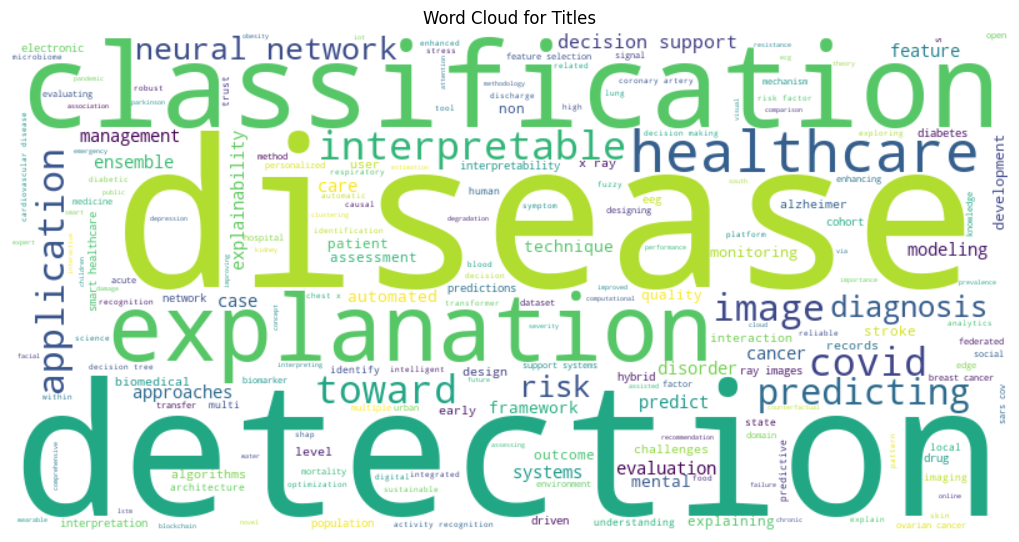

In [73]:
title_text = " ".join(pureDF['Title'].dropna().tolist())
generate_wordcloud(title_text, 'Word Cloud for Titles')

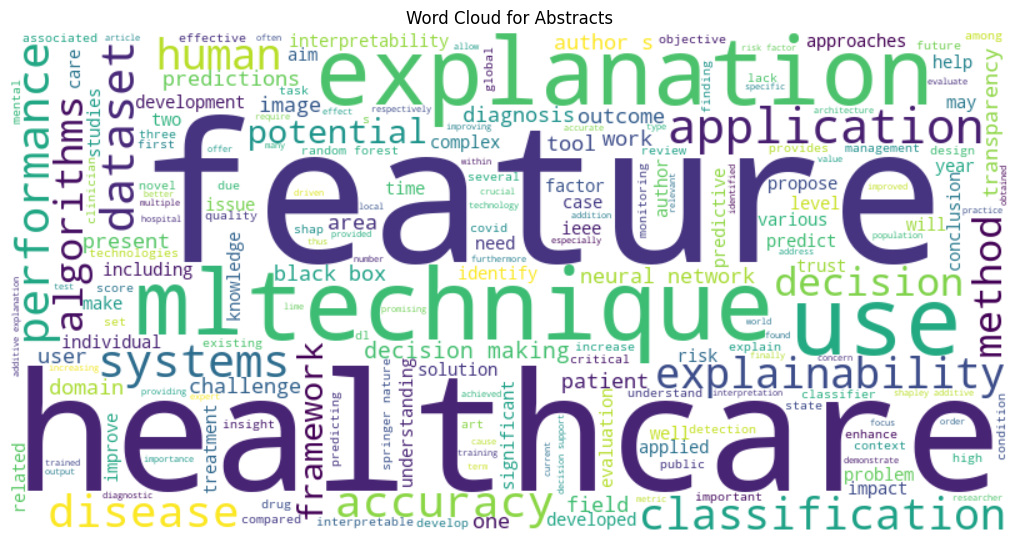

In [74]:
# Word cloud untuk Abstract
abstract_text = " ".join(TidyDF['Abstract'].dropna().tolist()).lower()
generate_wordcloud(abstract_text, 'Word Cloud for Abstracts')

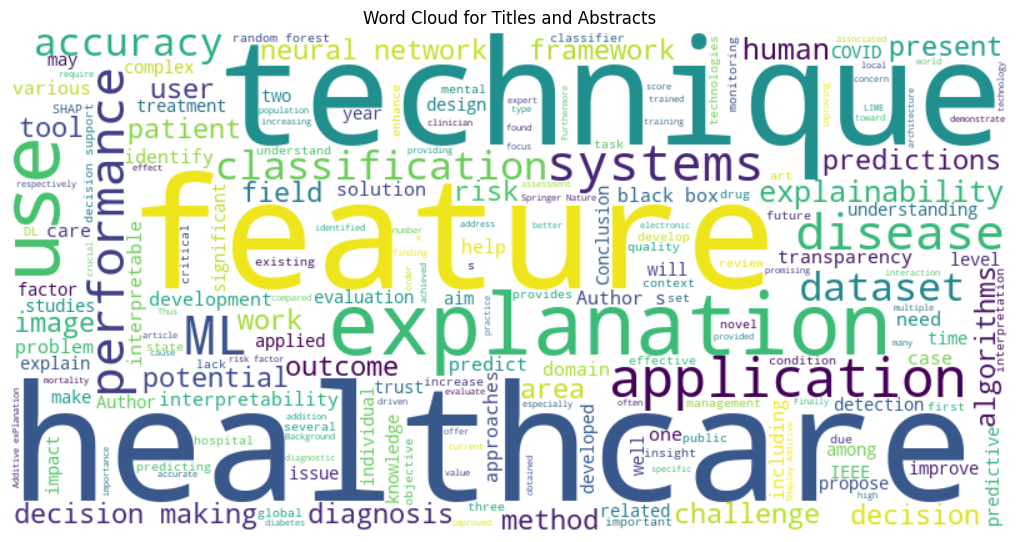

In [75]:
title_abstract_text = " ".join((TidyDF['Title'] + " " + TidyDF['Abstract']).dropna().tolist())
generate_wordcloud(title_abstract_text, 'Word Cloud for Titles and Abstracts')